# Features preprocessing explained

In [1]:
# Hidden notebook set-up

import os, sys
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
%matplotlib inline
sys.path.insert(0, os.path.abspath('/Users/gmaze/git/github/gmaze/pyxpcm'))

import pyxpcm
from pyxpcm.models import pcm

import seaborn as sns
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.ticker as mticker
import matplotlib as mpl

# Load sample data:
ds = pyxpcm.tutorial.open_dataset('isas_snapshot').load()

# Define vertical axis and features to use:
z = ds['depth'].where(ds['depth']>=-1200, drop=True)
features_pcm = {'TEMP': z, 'TEMP': z}

m = pcm(K=3, features=features_pcm)

## Stack

This step mask, extract, flatten and transform any ND-array set of feature variables (eg: temperature, salinity) into a plain 2D-array collection of vertical profiles usable for machine learning methods.

### Mask

In [2]:
mask = ds.pyxpcm.mask(m)
print(mask)

<xarray.DataArray 'pcm_MASK' (latitude: 53, longitude: 61)>
dask.array<eq, shape=(53, 61), dtype=bool, chunksize=(53, 61), chunktype=numpy.ndarray>
Coordinates:
  * longitude  (longitude) float32 -70.0 -69.5 -69.0 -68.5 ... -41.0 -40.5 -40.0
  * latitude   (latitude) float32 30.023445 30.455408 ... 49.41288 49.737103


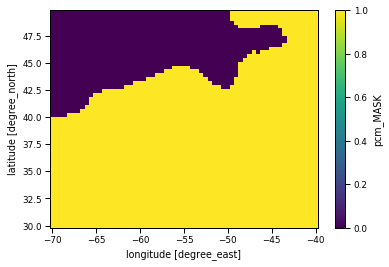

In [3]:
mask.plot();

### Ravel

In [4]:
m = pcm(K=3, features=features_pcm, chunk_size=1e3).fit(ds)

By default, ``chunk_size='auto'``.

In [5]:
X, z, sampling_dims = m.ravel(ds['TEMP'], dim='depth', feature_name='TEMP')
X

<xarray.DataArray 'TEMP' (sampling: 2289, depth: 152)>
dask.array<rechunk-merge, shape=(2289, 152), dtype=float32, chunksize=(1000, 152), chunktype=numpy.ndarray>
Coordinates:
  * depth      (depth) float32 -1.0 -3.0 -5.0 -10.0 ... -1960.0 -1980.0 -2000.0
  * sampling   (sampling) MultiIndex
  - latitude   (sampling) float64 30.02 30.02 30.02 30.02 ... 49.74 49.74 49.74
  - longitude  (sampling) float64 -70.0 -69.5 -69.0 -68.5 ... -41.0 -40.5 -40.0
Attributes:
    long_name:      Temperature 
    standard_name:  sea_water_temperature
    units:          degree_Celsius
    valid_min:      -23000
    valid_max:      20000

### Interpolate

Scale
-----

## Recuce

[TBC]

## Combine

[TBC]